Kashtanova Victoriya

# TP 4 - Perceptron, SVMs

Le perceptron est un modèle connexionniste inspiré des neurosciences : il modélise de manière très simpliste le fonctionnement d’un neurone. Le neurone dispose de $d$ signaux d’entrées $x_i \in R$ - le nombre de dimension de l’espace de description des exemples - et dans le cas simple de la classification binaire, une sortie $y$. Le perceptron utilise une fonction linéaire $f_w : R^d → R$ pour modéliser l’interaction entre les entrées et la sortie, paramétrée par un vecteur $w \in R^{d+1} : f_w(x) = \sum_{i=0}^d \omega_i x_i$ (la dimension $0$ permet l’ajout d’un signal constant - le biais). Dans le cas de la classification binaire dans un ensemble
$\{−1, 1\}$, la décision se fait selon le signe de $y ; \ +1$ si $f_w(x) > 0$, $−1$ sinon.
L’algorithme d’apprentissage du perceptron consiste à corriger itérativement les poids afin de réduire
l’erreur sur la base d’exemples :
1. Initialiser le vecteur de poids $\omega$ aléatoirement
2. Pour t de 1 à `max_iter` :
    - Pour chaque couple $(x_j, y_j)$ de la base d’apprentissage dans un ordre aléatoire,
    - Calculer $f_{w^t}(x^j)$ ;
    - Si $f_{w^t}(x^j)y^j > 0$, alors ne rien faire (pas d’erreur sur l’exemple) ;
    - Sinon, mettre à jour les poids : $w^{t+1} = w^t +\epsilon y^j x^j\, \epsilon$ un pas d’apprentissage (qui peut varier avec t).

Ce modèle est équivalent dans sa formulation à l’optimisation d’un classifieur linéaire avec une fonction de coût ``hinge loss`` : $l^{\alpha}(y, f_w(x)) = \max(0, \alpha − y f_w(x))$ avec $\alpha = 0$. L’algorithme de résolution
correspond à une variante d’une descente de gradient sur ce problème d’optimisation.

## 1 Implémentation du perceptron

### Q 1.1 La classe ``Perceptron``


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from malaptools import *

def proj_identity(data):
    return data

class Perceptron:
    def __init__(self,max_iter = 1000,eps=1e-3,projection = proj_identity, base = None):
        self.max_iter = max_iter
        self.eps = eps
        
        #projection fonction identite par default
        self.projection = projection 
        self.base = base

    def fit(self,data,y):
        if self.base is None :
            data = self.projection(data)
        else :
            data = self.projection(data, self.base)
            
        self.w = np.random.random((1,data.shape[1]))
        for i in range(self.max_iter):
            for j in np.random.permutation(data.shape[0]):
                f_w = np.dot(data[j, :], self.w.T)
                if (f_w*y[j] > 0) : pass
                else : self.w = self.w + self.eps*y[j]*data[j, :]
        return self.w
   
    def predict(self,data):
        if self.base is None :
            data = self.projection(data)    
        else :
            data = self.projection(data, self.base)
            
        prediction = np.sign(np.dot(data, self.w.T))
        return prediction 

    def score(self,data,y):
        y_predicted = self.predict(data)
        scoring = np.sum(np.maximum(0,y_predicted*y.reshape(-1,1)))/len(y)
        return scoring

### Q 1.2

For data type  0 , epsilon =  0.2  : 

score en train :  1.0
score en test :  1.0


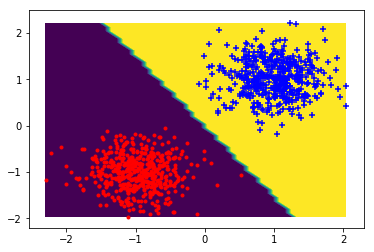

In [2]:
def question12 (epsilon = 0.2, data_type = 0):
    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)

    print('For data type ', data_type, ', epsilon = ', epsilon, ' : \n')
    
    ### Apprentissage
    model=Perceptron(eps=1e-2)
    model.fit(xtrain,ytrain)
    
    print("score en train : ", model.score(xtrain,ytrain))
    print("score en test : ", model.score(xtest,ytest))

    #### Tracer de frontiere
    plt.figure()
    plot_frontiere(xtrain,model.predict,50)
    plot_data(xtrain,ytrain) 
    
    
question12()

Comme on voit facilement dans le cas de données linéairement séparables la solution de classification n'est pas unique.

For data type  0 , epsilon =  1.0  : 

score en train :  0.905
score en test :  0.919


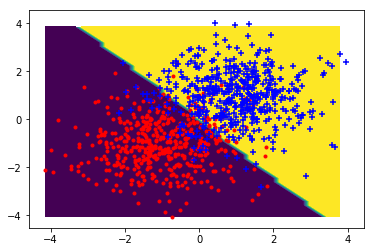

In [3]:
question12(epsilon = 1.0)

For data type  1 , epsilon =  0.2  : 

score en train :  0.498
score en test :  0.504


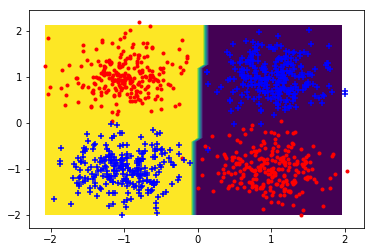

In [4]:
question12 (data_type = 1)

## 2 Données USPS

In [5]:
def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    
data_train, labels_train = load_usps('USPS_train.txt')
data_test, labels_test = load_usps('USPS_test.txt')

### Q 2.1

In [6]:
# make from the initial data specific data set only for indicated classes :
def create_2_class (data, labels, lb_class1, lb_class2):
    
    data_table = pd.DataFrame(data, index=labels)
    # make the shuffled data for indicated classes
    data_table_classes =  data_table.loc[lb_class1+lb_class2].sample(frac=1)
    
    # create data set in the usual format
    data_classes = np.array(data_table_classes)
    labels_classes = np.array(data_table_classes.index)
    
    # change the labels to {-1, 1}
    for i in lb_class1:
        np.place(labels_classes, labels_classes == i, [-1])
        
    for i in lb_class2:
        np.place(labels_classes, labels_classes == i, [1])
    
    return data_classes, labels_classes

For classes  [6]  vs  [9]  : 

Score en train :  1.0

Weight matrix : 



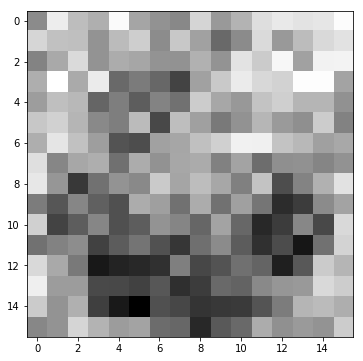

In [7]:
def question21 (data, labels, lb_class1 = [6], lb_class2 = [9]):
    ### Separation of the classes
    xtrain, ytrain = create_2_class(data, labels, lb_class1, lb_class2)

    print('For classes ', lb_class1, ' vs ', lb_class2, ' : \n')
    
    ### Apprentissage
    model=Perceptron(eps=1e-2)
    weight = model.fit(xtrain,ytrain)
    print("Score en train : ", model.score(xtrain,ytrain))
    #print("score en test : ", model.score(xtest,ytest))

    print("\nWeight matrix : \n")
    #print(weight)
    plt.figure(figsize=(20,6))
    show_usps(np.array(weight))
    plt.show()
      
question21(data_train, labels_train)

For classes  [2, 3]  vs  [4, 5]  : 

Score en train :  1.0

Weight matrix : 



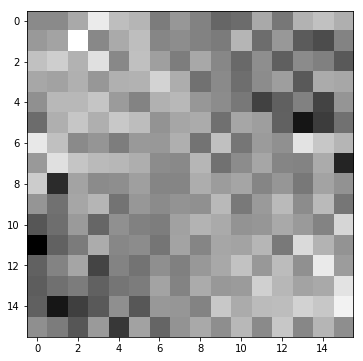

In [8]:
question21(data_train, labels_train, lb_class1 = [2,3], lb_class2 = [4,5])

### Q 2.2

For classes  [1]  vs  [3]  : 



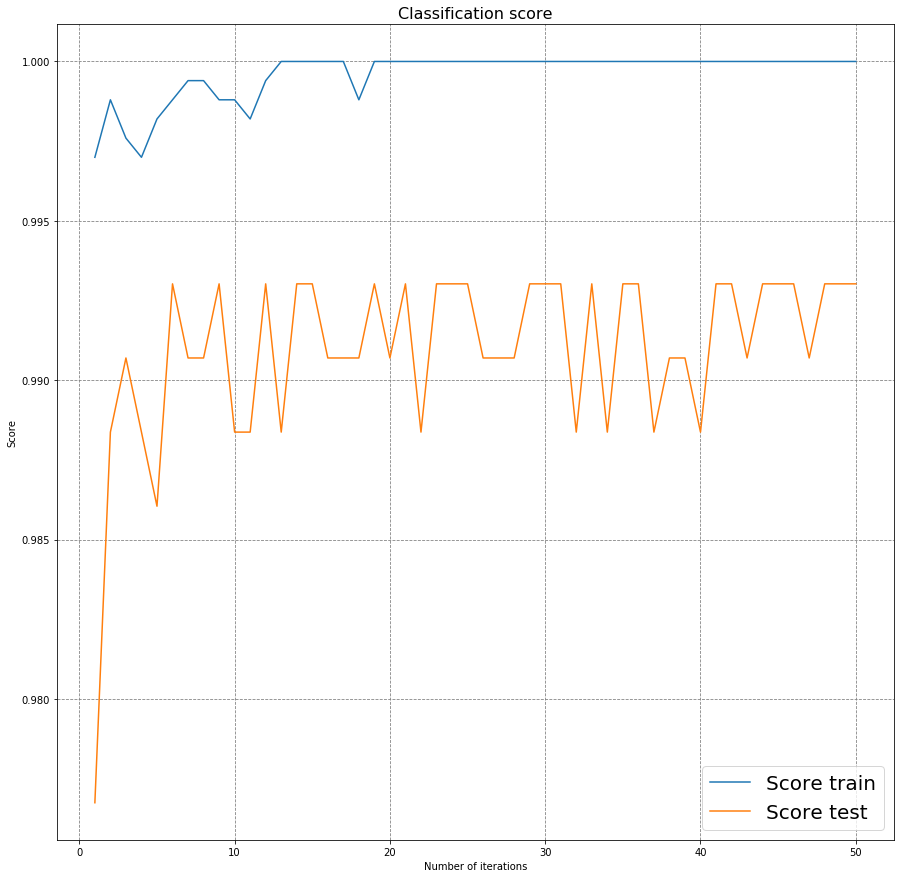

In [10]:
def question22 (max_iter = 1000, lb_class1 = [6], lb_class2 = [9]):
    
    ### Separation of the classes from existing data set (USPS)
    xtrain, ytrain = create_2_class(data_train, labels_train, lb_class1, lb_class2)
    xtest, ytest = create_2_class(data_test, labels_test, lb_class1, lb_class2)

    print('For classes ', lb_class1, ' vs ', lb_class2, ' : \n')
    
    score_train = []
    score_test = []
    
    iterations = np.arange(1, max_iter+1)
    
    for i in iterations:
        ### Apprentissage
        model=Perceptron(max_iter=i, eps=1e-2)
        weight = model.fit(xtrain,ytrain)
        
        score_train.append(model.score(xtrain,ytrain))
        score_test.append(model.score(xtest,ytest))
    
    fig = plt.figure(figsize=(15,15))
    ax1 = plt.subplot(111)
    ax1.plot(iterations , np.array(score_train), label='Score train')
    ax1.plot(iterations , np.array(score_test), label='Score test')
    ax1.set_title('Classification score', fontsize = 16)
    ax1.legend(fontsize = 20)
    ax1.grid(color='gray', linestyle='dashed')
    plt.xlabel('Number of iterations')
    plt.ylabel('Score') 
    plt.show()


question22(max_iter = 50, lb_class1 = [1], lb_class2 = [3])

For classes  [1]  vs  [0, 2, 3, 4, 5, 6, 7, 8, 9]  : 



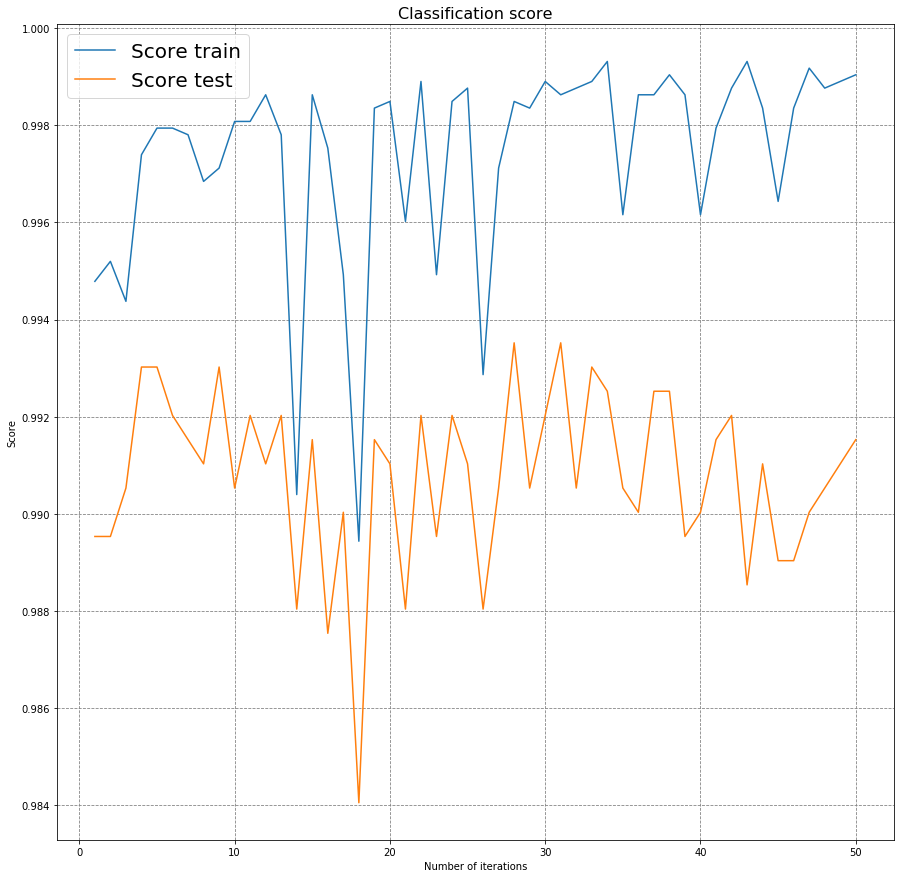

In [11]:
question22(max_iter = 50, lb_class1 = [1], lb_class2 = [0,2,3,4,5,6,7,8,9])

For classes  [1, 3]  vs  [6, 9]  : 



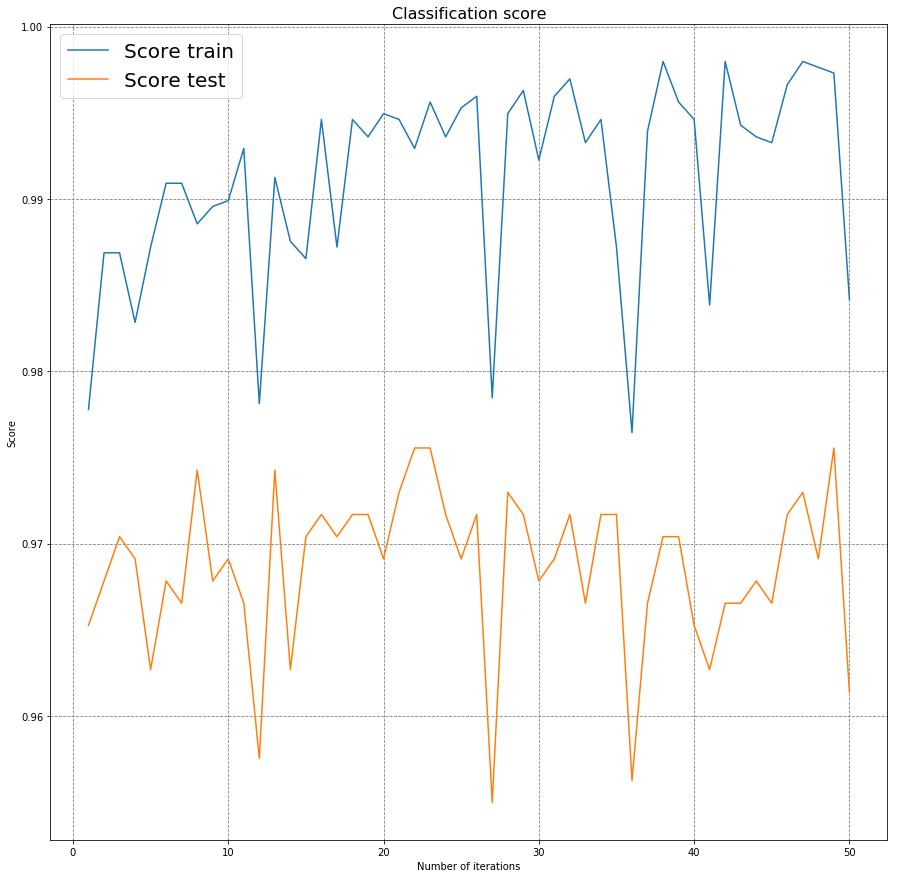

In [12]:
question22(max_iter = 50, lb_class1 = [1,3], lb_class2 = [6,9])

Comme on peut observer avec augmentation du nombre des itérations pendant entraînement du perceptron on a l'augmentation du score pour les données d'apprentissage. Et si on va utilise ``max_iter > 1000`` le score va converger vers 1 mais ça va prendre beaucoup de temps pour les calculs.

## 3 Expressivité et feature map

Afin d’augmenter l’expressivité des classifieurs linéaires, une opération très courante est de plonger
les données dans un espace de dimension supérieure. Soit $\phi : R^d → R^{d'}$ une fonction de plongement (feature map), l’apprentissage est fait alors sur l’ensemble $\{\phi(x^n), y^n\}$ avec un vecteur de poids $w$ de dimension $d'$.
Le paramètre ``projection`` de la classe ``Perceptron`` permet de pré-traiter les données en appliquant une fonction contenue dans la variable avant tout traitement.

### Q 3.1 Ajout d’un biais

In [13]:
def proj_biais(data):
    data_biais = np.ones([data.shape[0], data.shape[1]+1])
    data_biais[:,1:] = data
    return data_biais

For data type  0 , epsilon =  0.2  :  (projection Biais) 

score en train :  1.0
score en test :  1.0


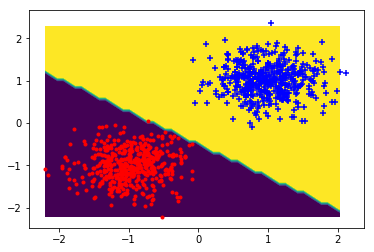

In [14]:
def question31 (epsilon = 0.2, data_type = 0):
    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)

    print('For data type ', data_type, ', epsilon = ', epsilon, ' :  (projection Biais) \n')
    
    ### Apprentissage
    model=Perceptron(eps=1e-2, projection = proj_biais)
    model.fit(xtrain,ytrain)
    
    print("score en train : ", model.score(xtrain,ytrain))
    print("score en test : ", model.score(xtest,ytest))

    #### Tracer de frontiere
    plt.figure()
    plot_frontiere(xtrain,model.predict,50)
    plot_data(xtrain,ytrain) 
    
    
question31()

For data type  0 , epsilon =  1.0  :  (projection Biais) 

score en train :  0.838
score en test :  0.833


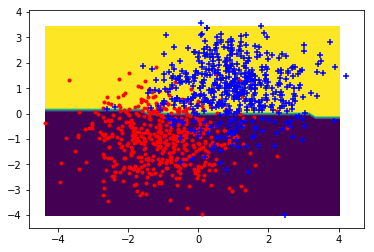

In [15]:
question31(epsilon = 1.0)

For data type  1 , epsilon =  0.2  :  (projection Biais) 

score en train :  0.443
score en test :  0.42


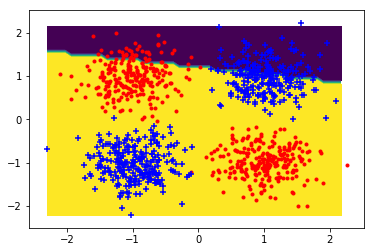

In [16]:
question31 (data_type = 1)

### Q 3.2 Plongement polynomiale dans le cas 2D 

In [17]:
def proj_poly(data):
    data_poly = np.ones([data.shape[0], data.shape[1]+4])
    data_poly[:,1:3] = data
    data_poly[:,3] = data[:,0]*data[:,1]
    data_poly[:,4] = data[:,0]*data[:,0]
    data_poly[:,5] = data[:,1]*data[:,1]
    return data_poly

For data type  0 , epsilon =  0.2  :  (projection Poly) 

score en train :  1.0
score en test :  0.999


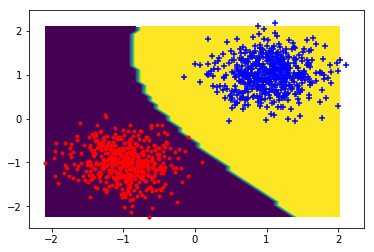

In [18]:
def question32 (epsilon = 0.2, data_type = 0):
    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)

    print('For data type ', data_type, ', epsilon = ', epsilon, ' :  (projection Poly) \n')
    
    ### Apprentissage
    model=Perceptron(eps=1e-2, projection = proj_poly)
    model.fit(xtrain,ytrain)
    
    print("score en train : ", model.score(xtrain,ytrain))
    print("score en test : ", model.score(xtest,ytest))

    #### Tracer de frontiere
    plt.figure()
    plot_frontiere(xtrain,model.predict,50)
    plot_data(xtrain,ytrain) 
    
    
question32()

For data type  0 , epsilon =  1.0  :  (projection Poly) 

score en train :  0.862
score en test :  0.87


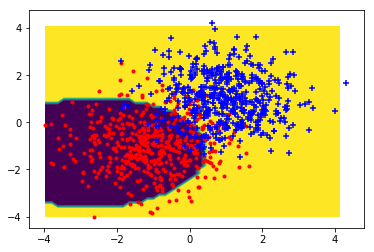

In [19]:
question32 (epsilon = 1.0)

For data type  1 , epsilon =  0.2  :  (projection Poly) 

score en train :  0.986
score en test :  0.99


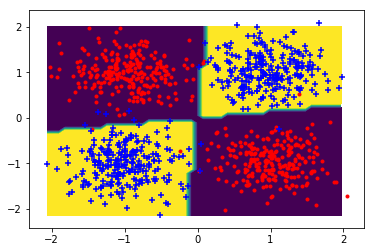

In [20]:
question32 (data_type = 1)

### Q 3.3 Plongement gaussien

Soit $ B = \{o^i \in R^d \}_{i=1}^{N_b}$ un ensemble de points dans l’espace de description des exemples. Soit 
$$gauss_B(x) = (k(x, o^1), k(x, o^2), \dots , k(x, o^{N_b})) \ \text{avec} \ k(x, x')= \exp{-\frac{||x-x'||}{2\sigma^2}}.$$
#### Q 3.3.1
Quand on entraîne notre perceptron sur les données de l'espace projeté on obtient le vector des poids qui correspondent respectivement à chaque dimension de cet espace. Par ailleurs, la valeur null d'un poids indique que cette caractéristique n'est pas utilisé dans la prédiction des classes ; et la grande valeur absolue d'un poids indique que cette caractéristique est tres specifique pour l'un de classes (avec signe -1 ou 1 respectivement).

In [21]:
from numpy import linalg as LA

def noyau (x, y, sigma = 1):
    return np.exp(LA.norm(x-y)**2/(2*sigma**2))
    
def proj_gauss(data, base):
    data_gauss = np.ones([data.shape[0], base.shape[0]])
    data_gauss [:,] = [np.array([noyau(x, y) for y in base]) for x in data]
    return data_gauss

For data type  0 , epsilon =  0.2  :  (projection Gauss) 

score en train :  1.0
score en test :  1.0


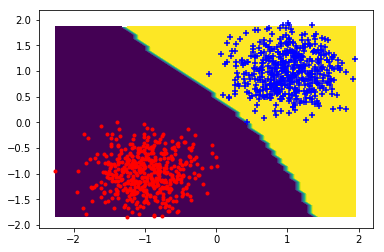

In [22]:
def question33 (num_base = 300, epsilon = 0.2, data_type = 0):
    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)

    base = np.random.randn(num_base, xtrain.shape[1])
    #base = xtrain[:num_base,]
    
    print('For data type ', data_type, ', epsilon = ', epsilon, ' :  (projection Gauss) \n')
    
    ### Apprentissage
    model=Perceptron(eps=1e-2, projection = proj_gauss, base = base)
    model.fit(xtrain,ytrain)
    
    print("score en train : ", model.score(xtrain,ytrain))
    print("score en test : ", model.score(xtest,ytest))

    #### Tracer de frontiere
    plt.figure()
    plot_frontiere(xtrain,model.predict,50)
    plot_data(xtrain,ytrain) 
    
    
question33()

For data type  0 , epsilon =  1.0  :  (projection Gauss) 

score en train :  0.887
score en test :  0.894


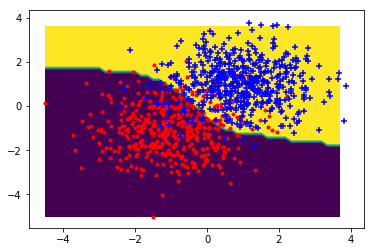

In [23]:
question33 (epsilon = 1.0)

For data type  1 , epsilon =  0.2  :  (projection Gauss) 

score en train :  0.987
score en test :  0.991


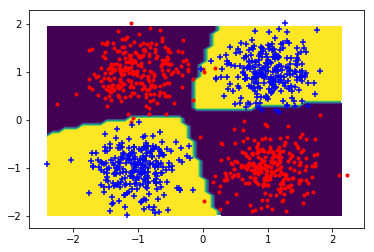

In [24]:
question33 (data_type = 1)

## 4 SVM et Grid Search

In [25]:
from sklearn import svm
plt.rcParams['figure.figsize'] = [15.0, 10.0]

### Q 4.1

For data type  0 , epsilon =  0.2  :  (SVM) 



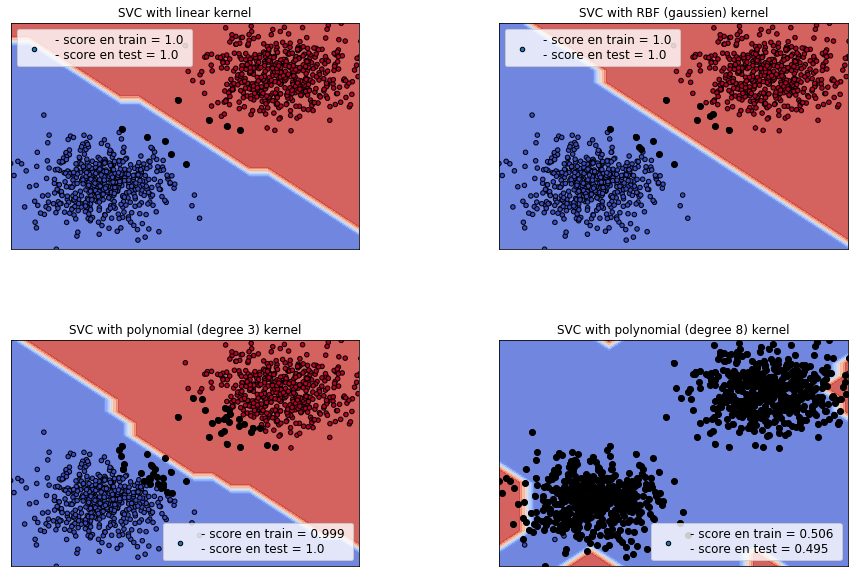

In [26]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def question41 (epsilon = 0.2, data_type = 0):
    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)
   
    print('For data type ', data_type, ', epsilon = ', epsilon, ' :  (SVM) \n')
    
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='rbf', gamma=0.2, C=C),
               svm.SVC(kernel='poly', degree=3, C=C),
              svm.SVC(kernel='poly', degree=8, C=C))
    
    models = (clf.fit(xtrain,ytrain) for clf in models)

    # title for the plots
    titles = ('SVC with linear kernel',
              'SVC with RBF (gaussien) kernel',
              'SVC with polynomial (degree 3) kernel',
              'SVC with polynomial (degree 8) kernel')

    X0, X1 = xtrain[:, 0], xtrain[:, 1]
    grid, xx, yy = make_grid(xtrain)
    
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=ytrain, cmap=plt.cm.coolwarm, s=20, edgecolors='k', \
                   label='- score en train = {} \n- score en test = {} '.format(clf.score(xtrain,ytrain),clf.score(xtest,ytest)))
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color='black')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.legend(fontsize = 12)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()
    
    
question41()

For data type  0 , epsilon =  1.0  :  (SVM) 



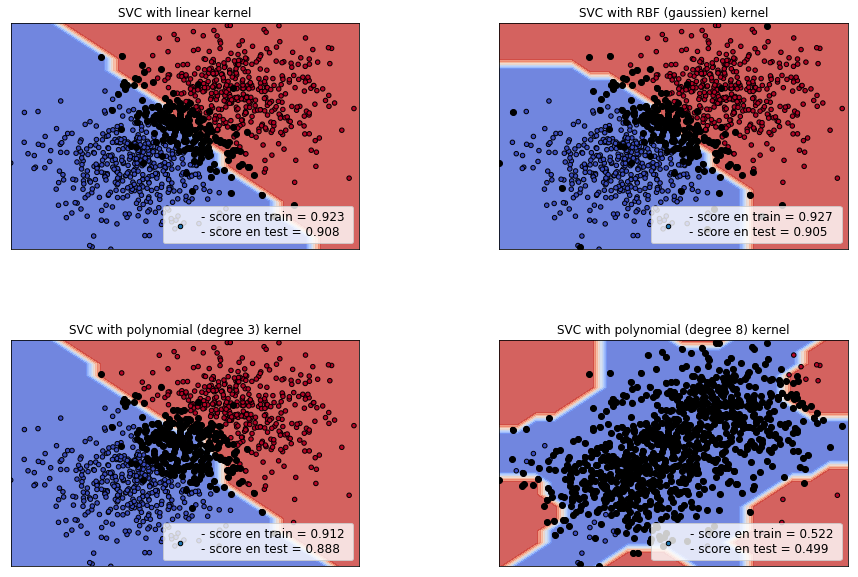

In [27]:
question41 (epsilon = 1.0)

For data type  1 , epsilon =  0.2  :  (SVM) 



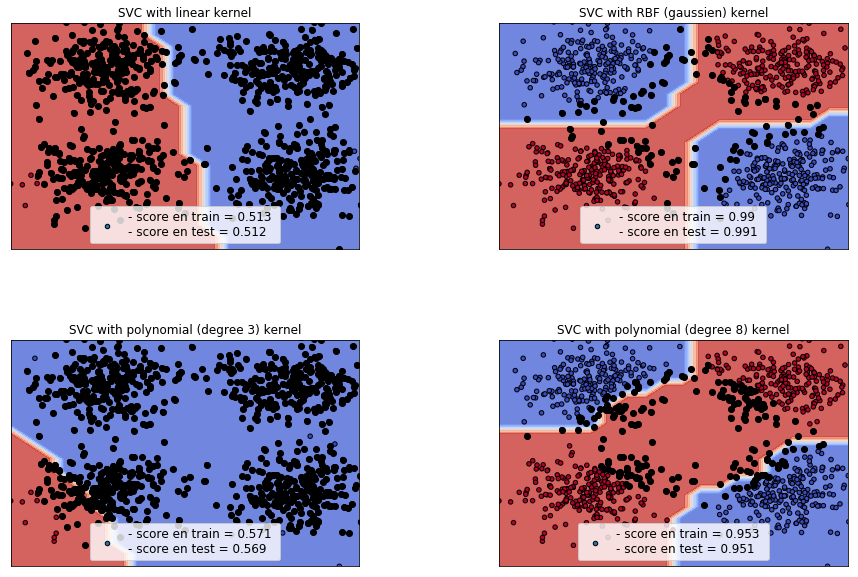

In [28]:
question41 (data_type = 1)

### Q 4.2 (Validation croisée et selection des paramètres)

In [29]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

C:\Users\13_Vi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
def plot_validation (X_train, y_train, X_test, y_test, gammas, degrees):
    
    gauss_err_train = np.array([(svm.SVC(kernel='rbf', gamma=k).fit(X_train, y_train).score(X_train, y_train)) \
                             for k in gammas])
    poly_err_train = np.array([(svm.SVC(kernel='poly', degree=k).fit(X_train, y_train).score(X_train, y_train)) \
                             for k in degrees])
    
    gauss_err_test = np.array([(svm.SVC(kernel='rbf', gamma=k).fit(X_train, y_train).score(X_test, y_test)) \
                             for k in gammas])
    poly_err_test = np.array([(svm.SVC(kernel='poly', degree=k).fit(X_train, y_train).score(X_test, y_test)) \
                             for k in degrees])
    

    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax1.plot(gammas , gauss_err_train, label='Train')
    ax1.plot(gammas , gauss_err_test, label='Test')
    ax1.set_title('Score (Kernel - RBF)', fontsize = 16)
    ax1.legend(fontsize = 14)
    plt.xlabel('Hyper-parameter')
    plt.ylabel('Error')
    ax1.grid(color='gray', linestyle='dashed')

    
    ax2 = plt.subplot(212)
    ax2.plot(degrees, poly_err_train, label='Train')
    ax2.plot(degrees, poly_err_test, label='Test')
    ax2.set_title('Score (Kernel - Poly)', fontsize = 16)
    ax2.legend(fontsize = 14)
    plt.xlabel('Hyper-parameter')
    plt.ylabel('Error')
    ax2.grid(color='gray', linestyle='dashed')
    
    plt.show()
    
    set_hyp_par = np.array([gammas[np.argmax(gauss_err_train)], gammas[np.argmax(gauss_err_test)], 
                            degrees[np.argmax(poly_err_train)], degrees[np.argmax(poly_err_test)]])
    
    print ('The best hyper paramaters : ', set_hyp_par)
    
    #return set_hyp_par

In [31]:
def question42 (epsilon = 0.2, data_type = 0, gammas = np.arange(0.1, 1, 0.1), degrees = np.arange(1,10)):
    ### Generation de donnees
    xtrain,ytrain = gen_arti(data_type=data_type,epsilon=epsilon)
    xtest,ytest = gen_arti(data_type=data_type,epsilon=epsilon)
    
    print('For data type ', data_type, ', epsilon = ', epsilon, ' :  (SVM) \n')
    
    parameter_degree = {'degree': degrees} 
    parameter_gamma = {'gamma': gammas}
    
    
    rbf_m = GridSearchCV(svm.SVC(kernel='rbf'), parameter_gamma, scoring='accuracy')
    rbf_m.fit(xtrain,ytrain)
    print ('\nSVC with RBF (gaussien) kernel : \n')
    print ("Optimal parameters:", rbf_m.best_params_)
    print ("Score:", rbf_m.best_score_)
    
    poly_m = GridSearchCV(svm.SVC(kernel='poly'), parameter_degree, scoring='accuracy')
    poly_m.fit(xtrain,ytrain)
    print ('\nSVC with polynomial kernel : \n') 
    print ("Optimal parameters:", poly_m.best_params_)
    print ("Score:", poly_m.best_score_)
    
    plot_validation(xtrain,ytrain,xtest,ytest, gammas, degrees)
    

For data type  0 , epsilon =  0.2  :  (SVM) 


SVC with RBF (gaussien) kernel : 

Optimal parameters: {'gamma': 0.1}
Score: 1.0

SVC with polynomial kernel : 

Optimal parameters: {'degree': 1}
Score: 1.0


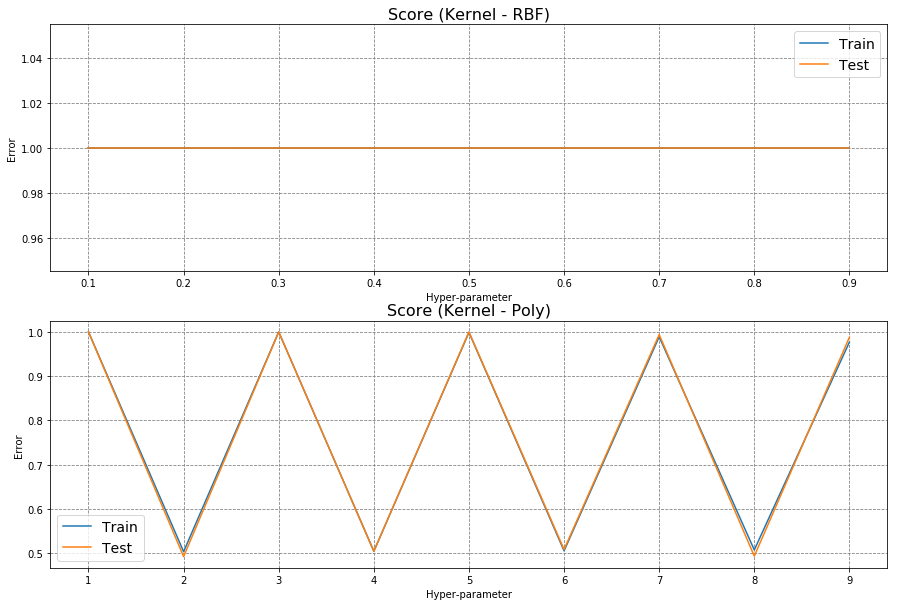

The best hyper paramaters :  [0.1 0.1 1.  1. ]


In [32]:
question42()

For data type  0 , epsilon =  1.0  :  (SVM) 


SVC with RBF (gaussien) kernel : 

Optimal parameters: {'gamma': 0.1}
Score: 0.916

SVC with polynomial kernel : 

Optimal parameters: {'degree': 1}
Score: 0.916


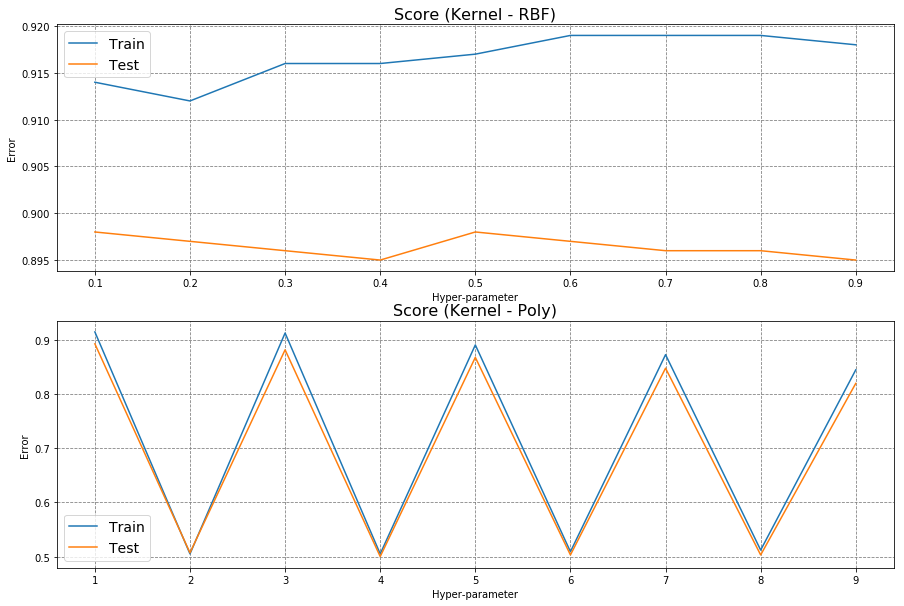

The best hyper paramaters :  [0.6 0.1 1.  1. ]


In [33]:
question42 (epsilon = 1.0)

For data type  1 , epsilon =  0.2  :  (SVM) 


SVC with RBF (gaussien) kernel : 

Optimal parameters: {'gamma': 0.4}
Score: 0.994

SVC with polynomial kernel : 

Optimal parameters: {'degree': 2}
Score: 0.996


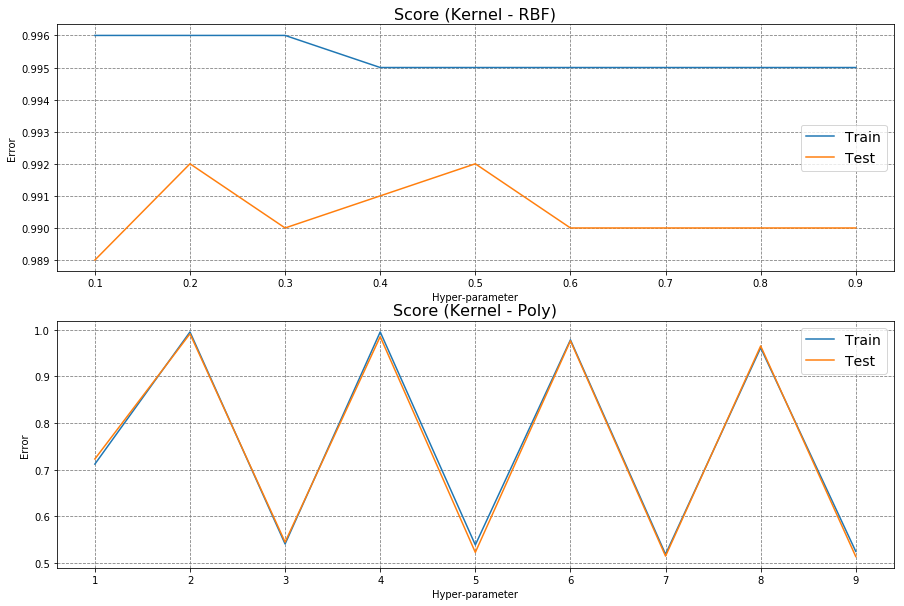

The best hyper paramaters :  [0.1 0.2 2.  2. ]


In [34]:
question42 (data_type = 1)

Comme on peut remarquer pour les données tres mélangés on ne peut pas obtenir le score environ 1, mais on a le score maximal pour les mêmes paramètres obtenus avec Grid Search et avec les courbes du score.